In [40]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [41]:
from IPython.display import Image
from IPython.core.display import HTML 

# Load the data from the csv

In [42]:
df=pd.read_csv('data_house_pricing.csv')

In [43]:
df.head(10)

,index,area,bathrooms,price,sq_price
0,0,2104.0,3.0,399900.0,190.066540
1,1,1600.0,3.0,329900.0,206.187500
2,2,2400.0,3.0,369000.0,153.750000
3,3,1416.0,2.0,232000.0,163.841808
4,4,3000.0,4.0,539900.0,179.966667
5,5,1985.0,4.0,299900.0,151.083123
6,6,1534.0,3.0,314900.0,205.280313
7,7,1427.0,3.0,198999.0,139.452698
8,8,1380.0,3.0,212000.0,153.623188
9,9,1494.0,3.0,242500.0,162.315930


# Remove unnessary colums

In [44]:
df=df.drop(['index','price','sq_price'],axis=1)

In [45]:
df=df[0:10]

In [46]:
df

,area,bathrooms
0,2104.0,3.0
1,1600.0,3.0
2,2400.0,3.0
3,1416.0,2.0
4,3000.0,4.0
5,1985.0,4.0
6,1534.0,3.0
7,1427.0,3.0
8,1380.0,3.0
9,1494.0,3.0


# Introduce the labels as this is a Classification Problem

In [47]:
df.loc[:,('y1')]=[1,1,1,0,0,1,0,1,1,1]
df.loc[:,('y2')]=df['y1']==0
df

,area,bathrooms,y1,y2
0,2104.0,3.0,1,False
1,1600.0,3.0,1,False
2,2400.0,3.0,1,False
3,1416.0,2.0,0,True
4,3000.0,4.0,0,True
5,1985.0,4.0,1,False
6,1534.0,3.0,0,True
7,1427.0,3.0,1,False
8,1380.0,3.0,1,False
9,1494.0,3.0,1,False


In [48]:
df.loc[:,('y2')]=df['y2'].astype('int')
df

,area,bathrooms,y1,y2
0,2104.0,3.0,1,0
1,1600.0,3.0,1,0
2,2400.0,3.0,1,0
3,1416.0,2.0,0,1
4,3000.0,4.0,0,1
5,1985.0,4.0,1,0
6,1534.0,3.0,0,1
7,1427.0,3.0,1,0
8,1380.0,3.0,1,0
9,1494.0,3.0,1,0


# TensforFlow Code Starts

# #Convert data into tensors

In [49]:
inputX=df.loc[:,['area','bathrooms']].as_matrix()
inputY=df.loc[:,['y1','y2']].as_matrix()
print(inputY.shape)
inputX.shape


(10, 2)


(10, 2)

# hyper parameters

In [50]:
learning_rate=0.00001
training_epochs=2000
display_step=50
n_samples=inputY.size
n_samples

20

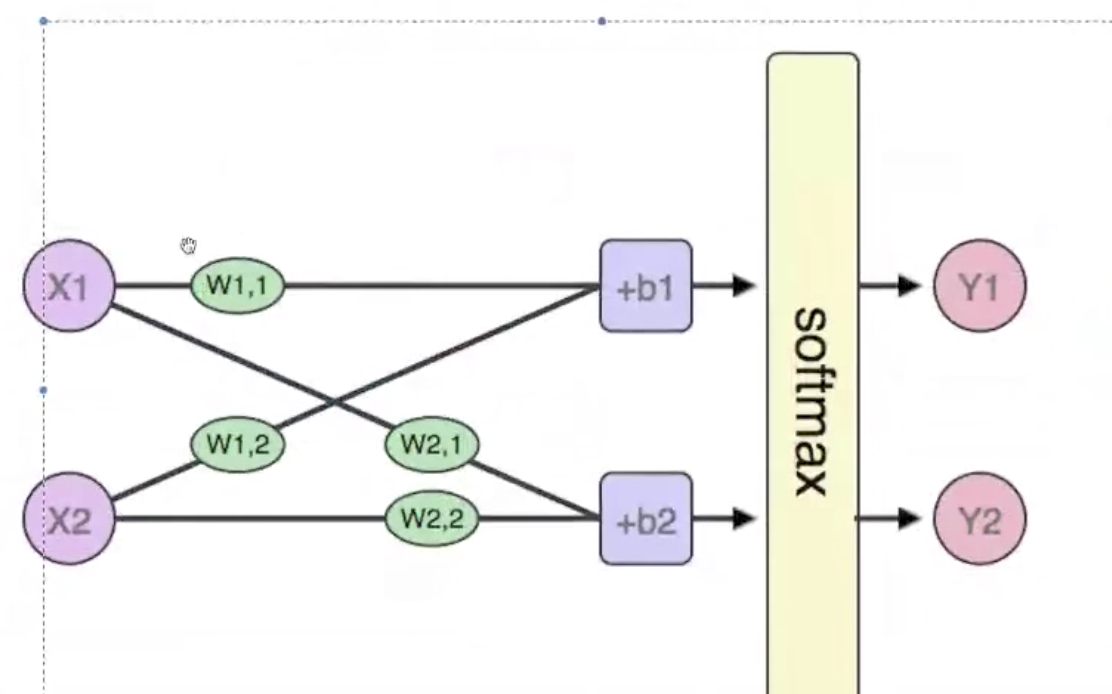

In [51]:
Image(filename = "NN_houseprice.jpg")

## A graph can be parameterized to accept external inputs, known as placeholders.they act like gateway for data into our computational graph
A placeholder is a promise to provide a value later.

In [52]:
#2 because we got 2 input parameters area,bathrooms=size of input sensor
x=tf.placeholder(tf.float32,[None,2])
#None=Any no of examples

In [53]:
#Create wiegths you can see the above diagram  w11,w12,w21,w22
#2*2 wirght matrix
W=tf.Variable(tf.zeros([2,2]))
W.value()

<tf.Tensor 'Variable_6/read:0' shape=(2, 2) dtype=float32>

In [54]:
#add biasis you need to bias as u have two inputs y=mx+b
b=tf.Variable(tf.zeros([2]))
b

<tf.Variable 'Variable_7:0' shape=(2,) dtype=float32_ref>

## Now Our Y=Wx+b
##In TensorFlow Multiplication=tf.matmul().which multiply two matrices...
##It gives you additional functionaties like transpose each and multiply ##als0

In [55]:
y_values=tf.add(tf.matmul(x,W),b)

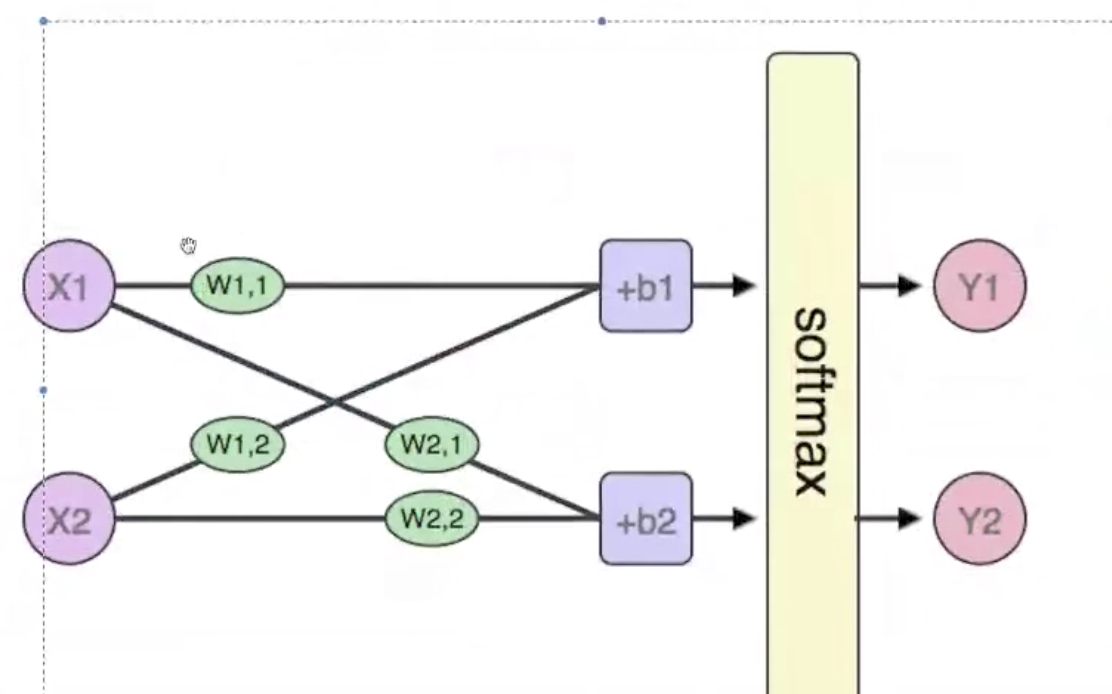

In [56]:
Image(filename = "NN_houseprice.jpg")

## Softmax =Activation Function
#which normlize the input into probabilities

In [57]:
y=tf.nn.softmax(y_values)
#output of which is nothing but the propabilities

In [58]:
#feed in a matrix of values
y_=tf.placeholder(tf.float32,[None,2])

# Perform Training

In [59]:
cost=tf.reduce_sum(tf.pow(y_-y,2))/(2*n_samples)

# Gradient descent

In [60]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


In [73]:
#Intialize variable and tensor session
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [74]:
#taining loop
for i in range(training_epochs):
    sess.run(optimizer,feed_dict={x:inputX,y_:inputY})
    #write out at certain points
    if (i)% display_step==0:
        cc=sess.run(cost,feed_dict={x:inputX,y_:inputY})
        print("Training step:", '%04d' % (i), "cost=", "{:.9f}".format(cc))
print( "Optimization Finished!")
training_cost = sess.run(cost, feed_dict={x: inputX, y_: inputY})
print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

Training step: 0000 cost= 0.134503588
Training step: 0050 cost= 0.112963296
Training step: 0100 cost= 0.112963341
Training step: 0150 cost= 0.112963364
Training step: 0200 cost= 0.112963364
Training step: 0250 cost= 0.112963393
Training step: 0300 cost= 0.112963438
Training step: 0350 cost= 0.112963483
Training step: 0400 cost= 0.112963483
Training step: 0450 cost= 0.112963513
Training step: 0500 cost= 0.112963557
Training step: 0550 cost= 0.112963572
Training step: 0600 cost= 0.112963602
Training step: 0650 cost= 0.112963632
Training step: 0700 cost= 0.112963654
Training step: 0750 cost= 0.112963699
Training step: 0800 cost= 0.112963714
Training step: 0850 cost= 0.112963721
Training step: 0900 cost= 0.112963758
Training step: 0950 cost= 0.112963796
Training step: 1000 cost= 0.112963811
Training step: 1050 cost= 0.112963840
Training step: 1100 cost= 0.112963870
Training step: 1150 cost= 0.112963893
Training step: 1200 cost= 0.112963915
Training step: 1250 cost= 0.112963937
Training ste

In [75]:
sess.run(y,feed_dict={x:inputX})

array([[ 0.64457554,  0.3554244 ],
       [ 0.61144364,  0.38855633],
       [ 0.66342938,  0.33657059],
       [ 0.5988487 ,  0.40115133],
       [ 0.70024157,  0.29975843],
       [ 0.63707429,  0.36292574],
       [ 0.60702008,  0.39297998],
       [ 0.59981126,  0.40018877],
       [ 0.59663081,  0.40336913],
       [ 0.60433042,  0.39566955]], dtype=float32)

# TensorBoard
Visualize your NN with the Tensor Board

In [77]:
writer=tf.summary.FileWriter("1")
writer.add_graph(sess.graph)

In [ ]:
Type the following commmand in your terminal/cmd
"tensorboard --logdir Documents/TensorFlow/1"
#(change the path where you writing the file)..it will show the URL http://0.0.0.0:6006/


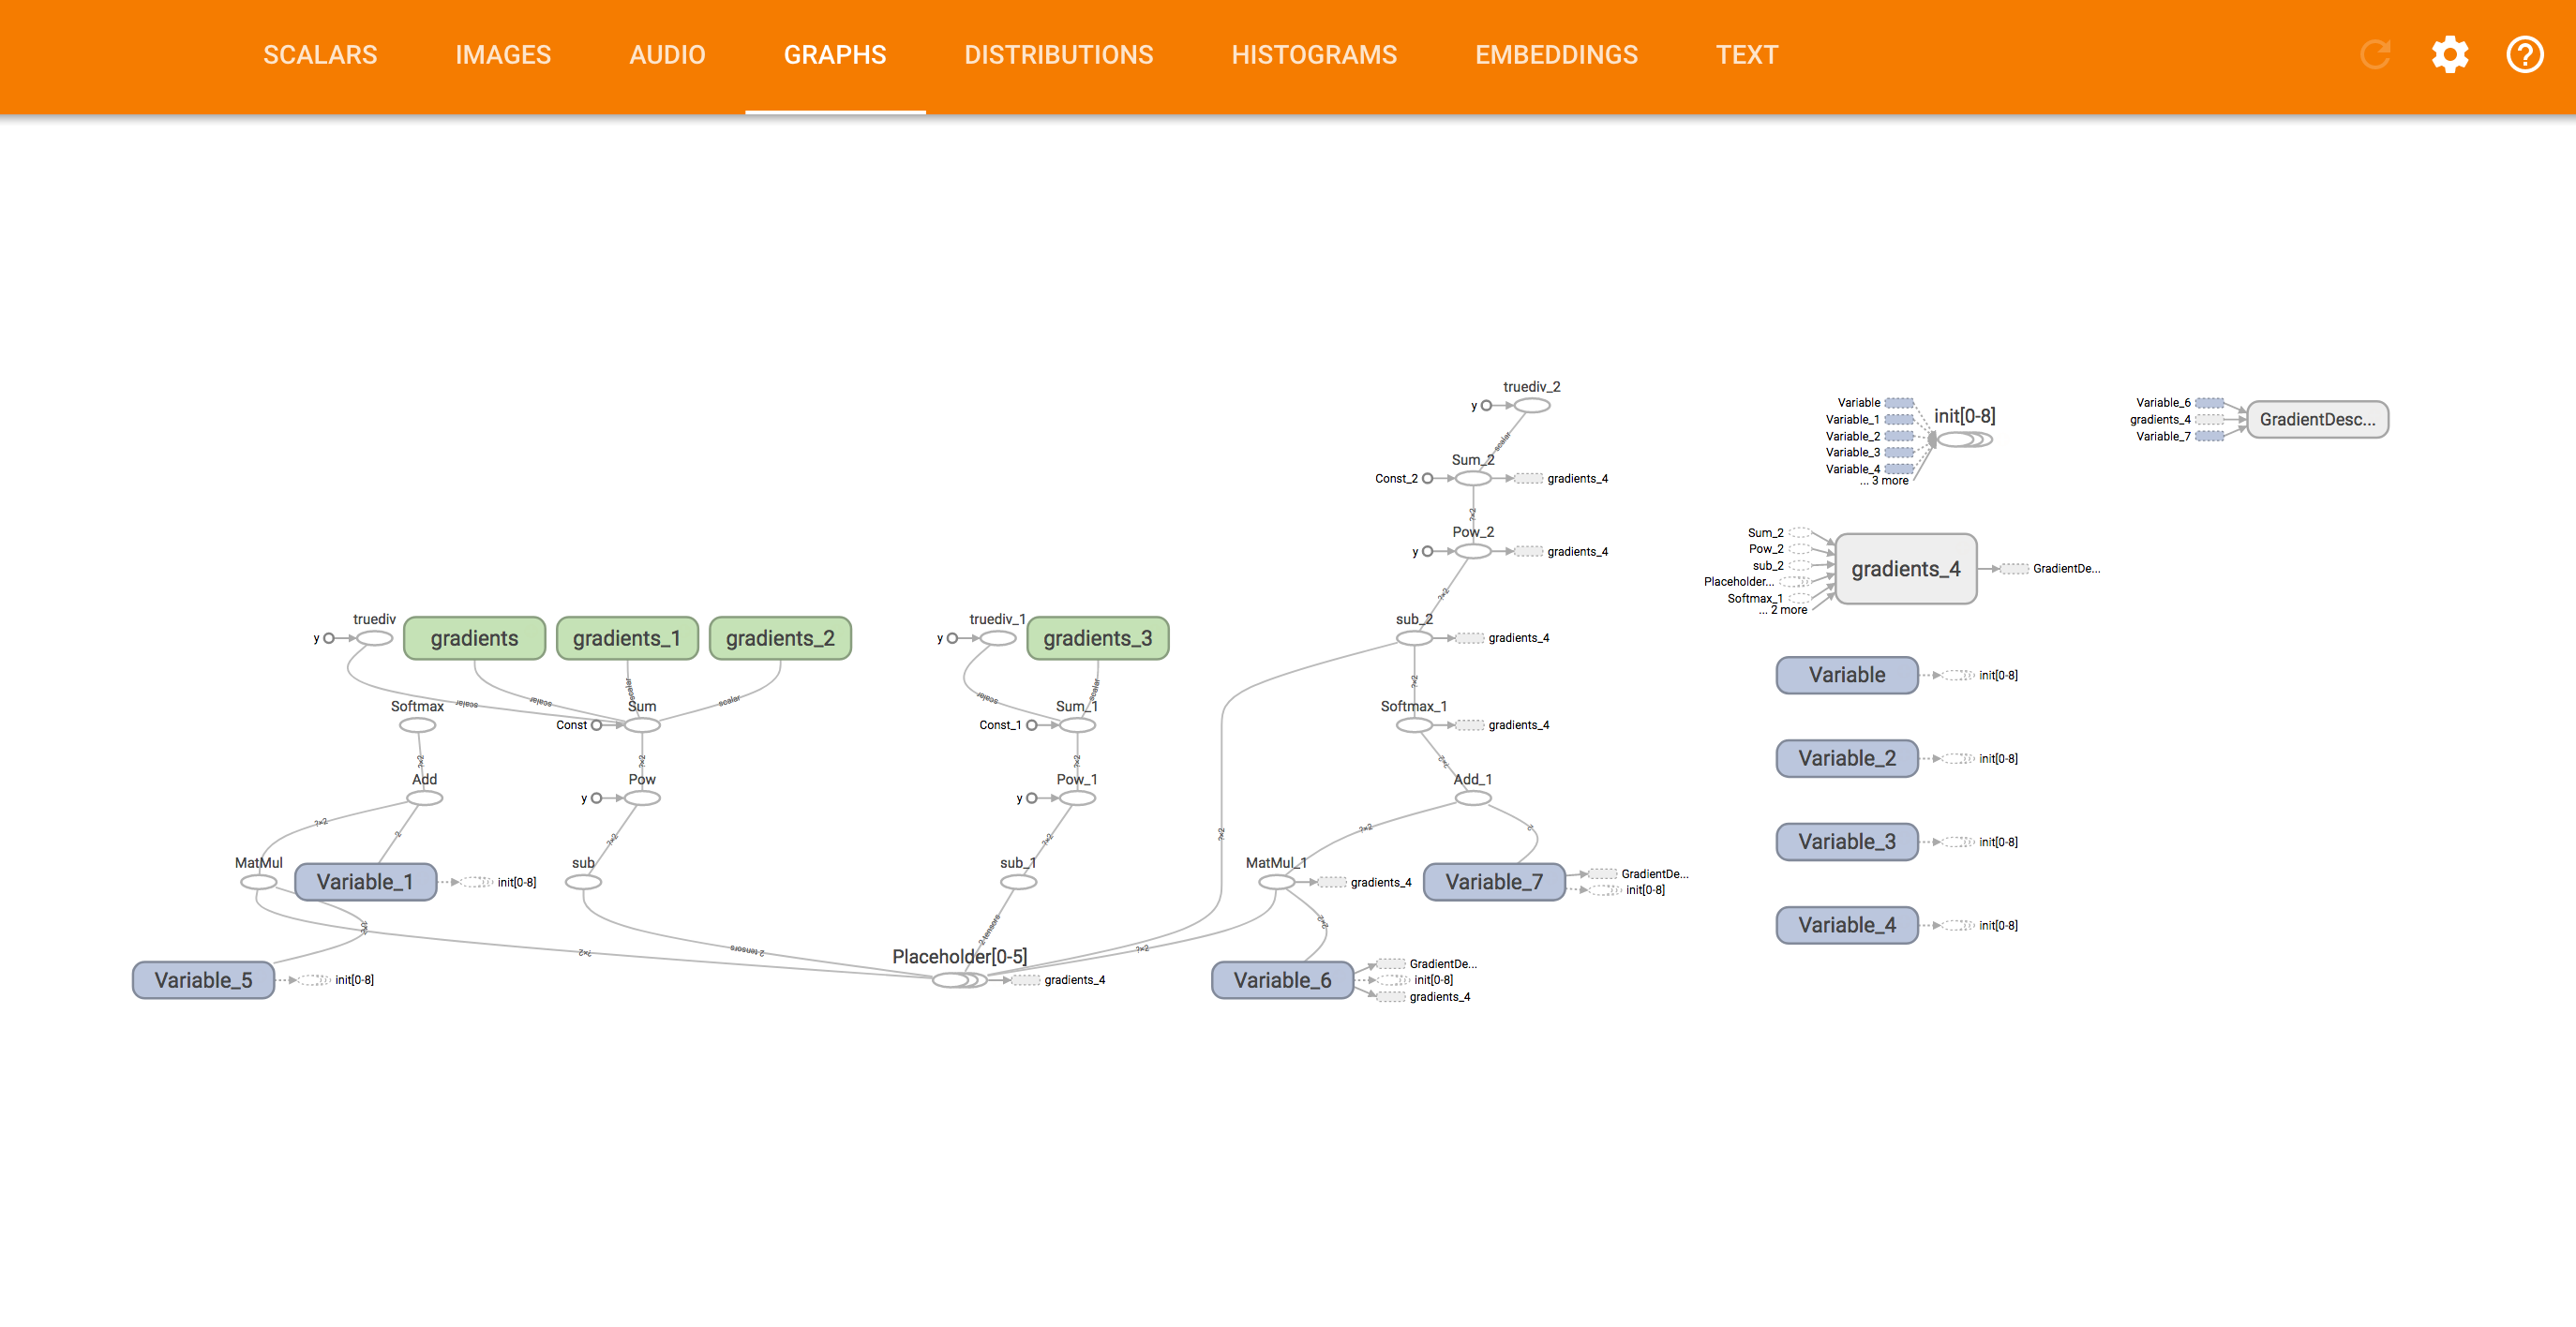

In [78]:
Image(filename = "TensorBoard_HousePricing.jpg")